In [1]:
import numpy as np
x=[1,4,5,6,6,2,3]

x_np=np.array(x)
z_score=(x_np-x_np.mean())/x_np.std()#x-x bar/std deviation
z_score

array([-1.58113883,  0.07905694,  0.63245553,  1.18585412,  1.18585412,
       -1.02774024, -0.47434165])

In [9]:
print(z_score)
print(z_score.max())
print(z_score.min())

[-1.58113883  0.07905694  0.63245553  1.18585412  1.18585412 -1.02774024
 -0.47434165]
1.185854122563142
-1.5811388300841895


In [10]:
minmax=(x_np-x_np.min())/(x_np.max()-x_np.min())
minmax

array([0. , 0.6, 0.8, 1. , 1. , 0.2, 0.4])

In [5]:
import pandas as pd
df=pd.read_csv('/home/anu/Downloads/Wine.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


# fit_transform in standard scaler-> finding mean,sd and x values
    #transform values into [0-1] range

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

for i in [StandardScaler(),MinMaxScaler()]:
    scale=i.fit_transform(df[["Alcohol","Malic acid"]])
    #fit_transform in standard scaler-> finding mean,sd and x values
    #transform values into 0-1 range
    print(f"{i}")
    print("==========")
    
    print(f"Mean value of Alcohol:{df['Alcohol'].mean():.2f},\
           Malic Acid {df['Malic acid'].mean():.2f}")
    print(f"Mean after standardization:Alcohol={scale[:,0].mean():.2f},Malic Acid={scale[:,1].mean():.2f}")
    
    print()
    
    print(f"Max value of Alcohol:{df['Alcohol'].max():.2f},\
           Malic Acid {df['Malic acid'].max():.2f}")
    print(f"Max after standardization:Alcohol={scale[:,0].max():.2f},\
           Malic Acid={scale[:,1].max():.2f}")
    print()

StandardScaler()
Mean value of Alcohol:13.00,           Malic Acid 2.34
Mean after standardization:Alcohol=-0.00,Malic Acid=-0.00

Max value of Alcohol:14.83,           Malic Acid 5.80
Max after standardization:Alcohol=2.26,           Malic Acid=3.11

MinMaxScaler()
Mean value of Alcohol:13.00,           Malic Acid 2.34
Mean after standardization:Alcohol=0.52,Malic Acid=0.32

Max value of Alcohol:14.83,           Malic Acid 5.80
Max after standardization:Alcohol=1.00,           Malic Acid=1.00



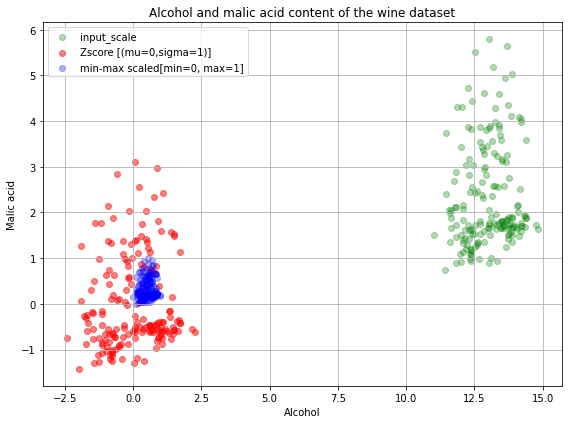

In [14]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

std_scale=preprocessing.StandardScaler().fit_transform(df[['Alcohol','Malic acid']])
min_max_scale=preprocessing.MinMaxScaler().fit_transform(df[['Alcohol','Malic acid']])

def plot():
    plt.figure(figsize=(8,6))
    
    plt.scatter(df['Alcohol'],df['Malic acid'],
               color='green',label='input_scale',alpha=0.3)
    plt.scatter(std_scale[:,0],std_scale[:,1],
               color='red',label='Zscore [(mu=0,sigma=1)]',alpha=0.5)
    
    plt.scatter(min_max_scale[:,0],min_max_scale[:,1],
               color='blue',label='min-max scaled[min=0, max=1]',alpha=0.3)
    
    plt.title('Alcohol and malic acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic acid')
    plt.legend(loc='upper left')#for information box alignment 
    plt.grid()
    
    plt.tight_layout()
    
plot()
plt.show()

In [ ]:
#Green points(value which is not standardized) comes in 10.0 to 15.0 range of alcohol
#Red points (zscored ones) comes in -2.5 to 2.5 range
#Blue points(min max scaled) comes in 0.0 to 2.5 and between 0 & 1